### Computations and plots for project in TMA4180 Optimization 1 

Import necessary functions

In [67]:
from project_definitions import *

### Part 1 - Cable networks with external nodes
Methods:
- gradient descent with constant stepsize, armijo condition and strong/weak wolfe conditions. 
- BFGS with strong wolfe condition

Constraint:
- fixed nodes 

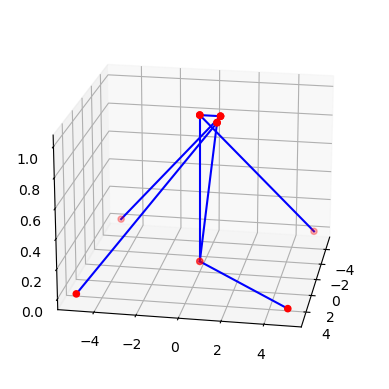

In [68]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
X[:,0] = [5,5,0]
X[:,1] = [-5,5,0]
X[:,2] = [-5,-5,0]
X[:,3] = [5,-5,0]
X[:,4:] = np.random.randint(2, size = np.shape(X[:,4:]))

mg = 1/6
pg = 0
k = 3 
c = 0

edges = np.array([[1,5], [5,6], [4,5], [2,6], [6,7], [3,7], [4,7], [0,4]])
create_edge(A, edges, 1)
B = np.zeros_like(A)
L = 3*np.ones_like(A)
fixed_points = [0,1,2,3]

plt.figure()
ax0 = plt.axes(projection = '3d')
plot_cable_net(X, A, ax0)
ax0.view_init(20,10)
np.set_printoptions(precision = 5)

Gradient descent with constant stepsize

number of gradient descent steps = 131, number of step size optimization = 0, norm of gradient = 8.768241173808986e-09, Energy = 1.1666666666666665
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


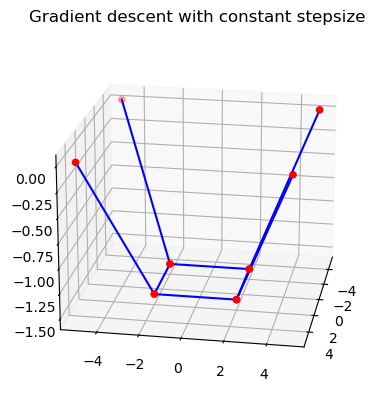

In [69]:
plt.figure()
ax1 = plt.axes(projection = '3d')
X_const_step = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-8)
plot_cable_net(X_const_step, A, ax1)
ax1.view_init(20,10)
ax1.set_title(f'Gradient descent with constant stepsize')
print(X_const_step)


Gradient descent with armijo condition

number of gradient descent steps = 42, number of step size optimization = 383, norm of gradient = 6.771468169658515e-09, Energy = 1.1666666666666659
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


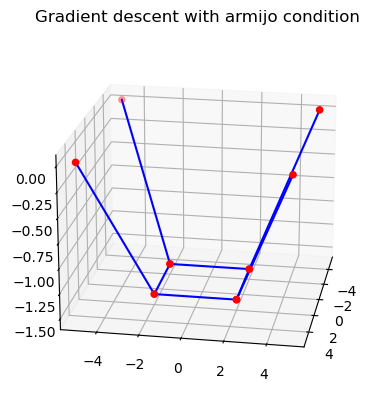

In [70]:

plt.figure()
ax2 = plt.axes(projection = '3d')
X_armijo = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-8, armijo = True)
plot_cable_net(X_armijo, A, ax2)
ax2.view_init(20,10)
ax2.set_title(f'Gradient descent with armijo condition')
print(X_armijo)

Gradient descent with weak wolfe condition

number of gradient descent steps = 42, number of step size optimization = 425, norm of gradient = 6.771468169658515e-09, Energy = 1.1666666666666659
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


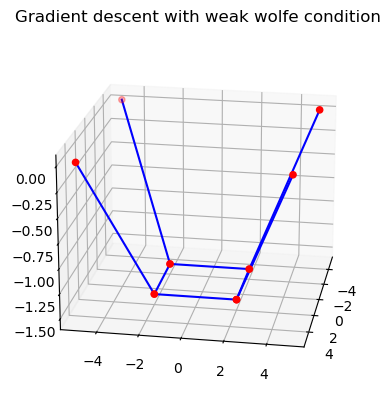

In [71]:

plt.figure()
ax3 = plt.axes(projection = '3d')
X_weak_wolfe = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-8, weak_w = True)
plot_cable_net(X_weak_wolfe, A, ax3)
ax3.view_init(20,10)
ax3.set_title(f'Gradient descent with weak wolfe condition')
print(X_weak_wolfe)



Gradient descent with strong wolfe condition

number of gradient descent steps = 58, number of step size optimization = 1197, norm of gradient = 5.933684324246567e-09, Energy = 1.1666666666666667
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


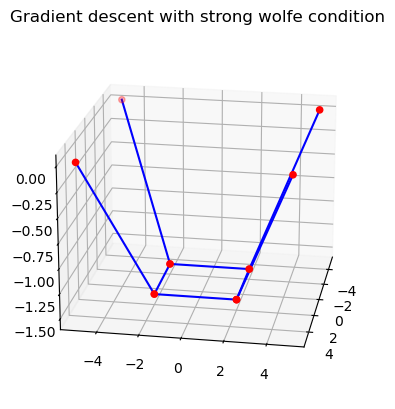

In [72]:

plt.figure()
ax3 = plt.axes(projection = '3d')
X_strong_wolfe = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, tol = 1e-8, strong_w = True)
plot_cable_net(X_strong_wolfe, A, ax3)
ax3.view_init(20,10)
ax3.set_title(f'Gradient descent with strong wolfe condition')
print(X_strong_wolfe)



BFGS 

||y|| = 0.0, ||s|| =  3.619003832068427e-16
number of BFGS steps = 43, number of step size optimization = 939, norm of gradient = 2.4036584547965875e-12, Energy = 1.1666666666666654
[[ 5.  -5.  -5.   5.   2.  -2.  -2.   2. ]
 [ 5.   5.  -5.  -5.   2.   2.  -2.  -2. ]
 [ 0.   0.   0.   0.  -1.5 -1.5 -1.5 -1.5]]


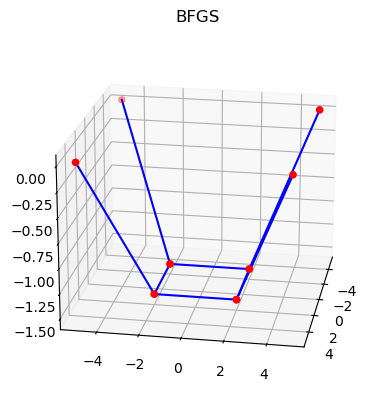

In [73]:

plt.figure()
ax4 = plt.axes(projection = '3d')
X_BFGS = BFGS(E,gradient_E, np.copy(X), A, B, L, fixed_points, mg , pg, k, c , tol = 1e-13, strong_w= True)
plot_cable_net(X_BFGS, A, ax4)
ax4.view_init(20,10)
ax4.set_title(f'BFGS')
print(X_BFGS)


### Part 2 network with cables, bars and external nodes
Methods:
- gradient descent with constant stepsize, armijo condition and strong/weak wolfe conditions. 
- BFGS with strong wolfe condition

Constraint:
- Fixed nodes

In [74]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
c = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  


cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)

Set all weight equal to zero, $k = 0.1$ and $c=1$

Text(0.5, 0.92, 'Initial state')

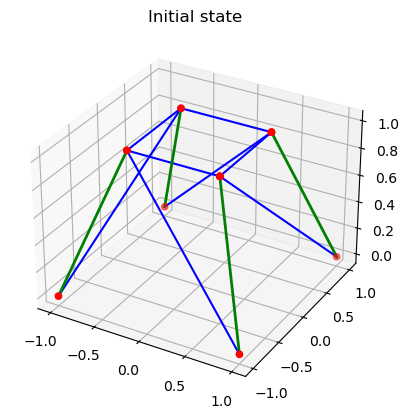

In [75]:
mg, pg, k, c = 0, 0, 0.1, 1
mu = 0

ax0 = plt.axes(projection = '3d')
plot_cable_net(X,A,ax0)
plot_bar_net(X,B,ax0)
ax0.set_title(f'Initial state')


Gradient descent with constant step size

number of gradient descent steps = 1000, number of step size optimization = 0, norm of gradient = 0.0004788054464676481, Energy = 0.009449621390368887
[[ 1.      -1.      -1.       1.      -0.63102  0.32425  0.63102 -0.32425]
 [ 1.       1.      -1.      -1.      -0.32425 -0.63102  0.32425  0.63102]
 [ 0.       0.       0.       0.       9.51384  9.51384  9.51384  9.51384]]


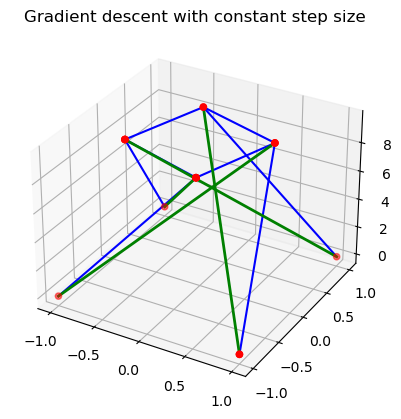

In [76]:
X_const_step = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c)
ax1 = plt.axes(projection = '3d')
plot_cable_net(X_const_step, A, ax1)
plot_bar_net(X_const_step, B, ax1)
ax1.set_title(f'Gradient descent with constant step size')
print(X_const_step)

Gradient descent with armijo condition

number of gradient descent steps = 1000, number of step size optimization = 12527, norm of gradient = 1.9104837613493385e-07, Energy = 0.009285570216482023
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09711e-01
  -9.77954e-06  7.09711e-01  9.77954e-06]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00  9.77954e-06
  -7.09711e-01 -9.77954e-06  7.09711e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


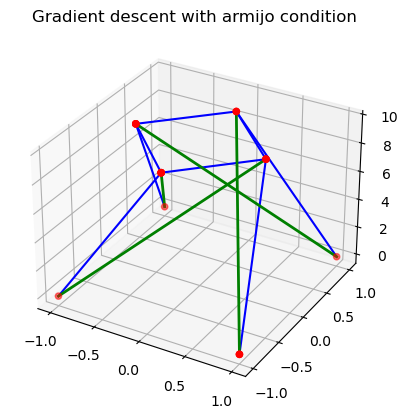

In [77]:
X_armijo = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, armijo= True)
ax1 = plt.axes(projection = '3d')

plot_cable_net(X_armijo, A, ax1)
plot_bar_net(X_armijo, B, ax1)
ax1.set_title(f'Gradient descent with armijo condition')
print(X_armijo)

Gradient descent with weak wolfe condition

number of gradient descent steps = 1000, number of step size optimization = 13567, norm of gradient = 1.910484879547126e-07, Energy = 0.009285570216478013
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09711e-01
  -9.63845e-06  7.09711e-01  9.63845e-06]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00  9.63844e-06
  -7.09711e-01 -9.63844e-06  7.09711e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


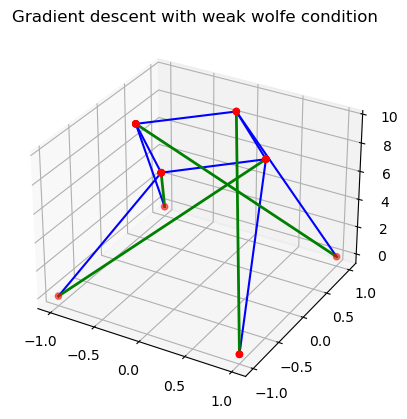

In [78]:
X_weak_wolfe = gradient_descent(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, weak_w= True)
ax1 = plt.axes(projection = '3d')

plot_cable_net(X_weak_wolfe, A, ax1)
plot_bar_net(X_weak_wolfe, B, ax1)
ax1.set_title(f'Gradient descent with weak wolfe condition')
print(X_weak_wolfe)

Gradient descent with strong wolfe condtion

number of BFGS steps = 32, number of step size optimization = 145, norm of gradient = 4.5033100777669056e-11, Energy = 0.009285570216250968
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09710e-01
  -1.95420e-09  7.09710e-01  1.95420e-09]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00  1.95420e-09
  -7.09710e-01 -1.95420e-09  7.09710e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


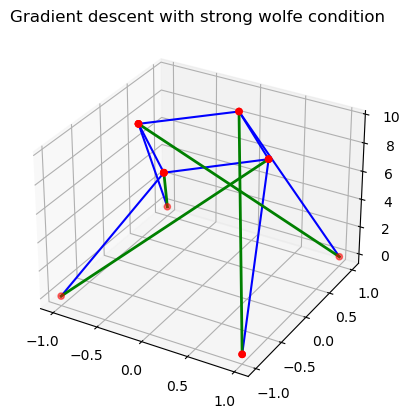

In [79]:
X_strong_wolfe = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c, strong_w = True)

ax1 = plt.axes(projection = '3d')

plot_cable_net(X_strong_wolfe, A, ax1)
plot_bar_net(X_strong_wolfe, B, ax1)
ax1.set_title(f'Gradient descent with strong wolfe condition')
print(X_strong_wolfe)

number of BFGS steps = 32, number of step size optimization = 145, norm of gradient = 4.5033100777669056e-11, Energy = 0.009285570216250968
[[ 1.00000e+00 -1.00000e+00 -1.00000e+00  1.00000e+00 -7.09710e-01
  -1.95420e-09  7.09710e-01  1.95420e-09]
 [ 1.00000e+00  1.00000e+00 -1.00000e+00 -1.00000e+00  1.95420e-09
  -7.09710e-01 -1.95420e-09  7.09710e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  9.54287e+00
   9.54287e+00  9.54287e+00  9.54287e+00]]


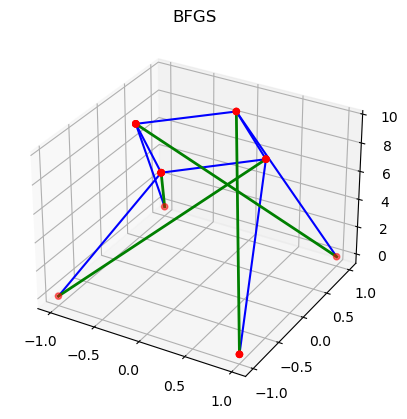

In [80]:
X_BFGS = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c)

ax1 = plt.axes(projection = '3d')

plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
ax1.set_title(f'BFGS')
print(X_BFGS)

Change of parameters. Give weight to external loads and bars. Stiffen material parameters

number of BFGS steps = 34, number of step size optimization = 242, norm of gradient = 8.473099171549819e-11, Energy = 0.13235571922156608
[[ 1.      -1.      -1.       1.      -0.70897  0.02548  0.70897 -0.02548]
 [ 1.       1.      -1.      -1.      -0.02548 -0.70897  0.02548  0.70897]
 [ 0.       0.       0.       0.       9.23457  9.23457  9.23457  9.23457]]


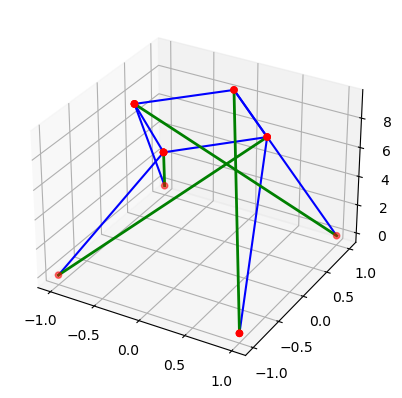

In [81]:
mg, pg, k, c = 0.001, 1e-4, 1,4

X_BFGS = BFGS(E, gradient_E, np.copy(X), A, B, L, fixed_points, mg, pg, k, c)

ax1 = plt.axes(projection = '3d')

plot_cable_net(X_BFGS, A, ax1)
plot_bar_net(X_BFGS, B, ax1)
print(X_BFGS)

### Part 3 Unconstrained optimization 

methods:
- Quadrative penalty method with BFGS as free optimization technique 

constraints:
- $x_i^3 \geq f(x_i^1, x_i^2)$

In [82]:
N = 8
X = np.zeros((3,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
a = 1
b = 1/2
c = 1
X[:,0] = [a,a,0]
X[:,1] = [-a,a,0]
X[:,2] = [-a,-a,0]
X[:,3] = [a,-a,0]

X[:,4] = [b,b,c]
X[:,5] = [-b,b,c]
X[:,6] = [-b,-b,c]
X[:,7] = [b,-b,c]  
#X[:,4:] = np.random.randint(-10, 10, size = (np.shape(X[:,4:])))

print(X)

cable_edges = np.array([[1,4], [2,5], [3,6], [0,7], [4,5], [5,6], [6,7], [7,4],[0,1], [1,2], [2,3], [3,0]])
bar_edges = np.array([[0,4], [1,5], [2,6], [3,7]])
create_edge(A, cable_edges)
create_edge(B, bar_edges)
fixed_points = [0,1,2,3]
L = 10*B + 8*A

edges = np.array([[4,5],[5,6],[6,7],[4,7]])
create_edge(L,edges, 1)
edges = np.array([[0,1], [1,2], [2,3], [3,0]])
create_edge(L,edges, 2)
mg, pg, k, c = 0, 0, 0.1, 1
mu = 0

[[ 1.  -1.  -1.   1.   0.5 -0.5 -0.5  0.5]
 [ 1.   1.  -1.  -1.   0.5  0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   1.   1.   1.   1. ]]


||y|| = 0.0, ||s|| =  -2.5899859535273277e-17
number of BFGS steps = 0, number of step size optimization = 0, norm of gradient = 2.184518499183317, Energy = 1.7401020514433643
0.4
||y|| = 0.0, ||s|| =  -2.7558122609361304e-17
number of BFGS steps = 0, number of step size optimization = 0, norm of gradient = 20.35600093324378, Energy = 3.5401020514433648
0.4
||y|| = 0.0, ||s|| =  0.2147065031454506
number of BFGS steps = 9, number of step size optimization = 309, norm of gradient = 0.1784682993071237, Energy = 0.8309608751149666
0.0
[[ 1.0392  -1.0392  -1.0392   1.0392  -0.82033  0.82033  0.82033 -0.82033]
 [ 1.0392   1.0392  -1.0392  -1.0392  -0.82033 -0.82033  0.82033  0.82033]
 [ 0.20145  0.20145  0.20145  0.20145  3.05719  3.05719  3.05719  3.05719]]


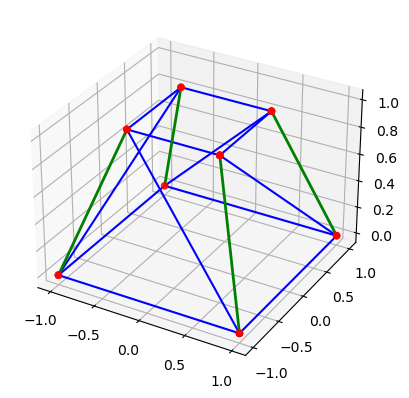

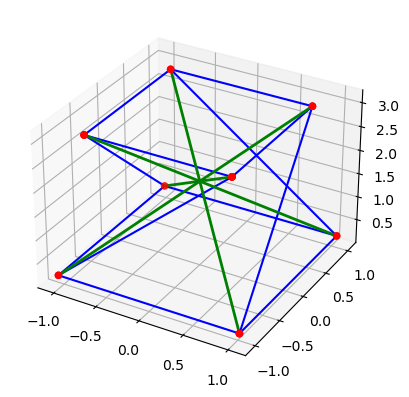

In [83]:
fixed_points = []
mg, pg, k, c = 0, 0, 0.1, 1
mu = 10
plt.figure()
ax0 = plt.axes(projection = '3d')
plot_cable_net(X, A, ax0)
plot_bar_net(X, B, ax0)
X_BFGS = np.copy(X)
for i in range(10):
    X_BFGS = BFGS(quad_penalty, gradient_quad_penalty, np.copy(X_BFGS), A, B, L, fixed_points, mg, pg, k, c, mu)
    print(np.sum(constraint(X_BFGS)))
    if(np.sum(constraint(X_BFGS)) < 1e-7):
        break
    mu *= 10
print(X_BFGS)
plt.figure()
ax0 = plt.axes(projection = '3d')
plot_cable_net(X_BFGS, A, ax0)
plot_bar_net(X_BFGS, B, ax0)